In [1]:
import os
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)     # Show all rows
pd.set_option("display.max_colwidth", None) # Show full width of columns
pd.set_option("display.width", 1000)        # Set the total width of the terminal output

from data_analysis_functions import generate_summary_df_from_csv, get_df_from_csv, get_trained_and_fixed_from_csv # type: ignore

## 4x4grid grid resco train -> get min and range values from data

env ran for 5000 simulation seconds, etc.
We now measure the tyre_pm reward as well as the delta_wait_time to figure out the averages of both values over time, and the ranges over time too. 
These values will then be used to inform the normalisation process in the reward function. 

The environment ran for 5000 simulation seconds. During this time, we measured both the tyre_pm reward and the delta_wait_time to ascertain their averages and ranges over time. These metrics will subsequently inform the normalization process within the reward function.

For every single agent, we will subtract the reward by the average value, then divide by the range.

In [2]:
FTC_EVALUATED_PATHS = ["reward_measuring_experiment/4x4grid_resco_train_corrected_5000s_scaled_route_distrib/diff_accum_wait_time_reward_raw",
                       "reward_measuring_experiment/4x4grid_resco_train_corrected_5000s_scaled_route_distrib/tyre_pm_reward"]
FTC_EVALUATED_ABS = [os.path.abspath(x) for x in FTC_EVALUATED_PATHS]

In [3]:
diff_accum_wait_time_reward_raw_df = get_df_from_csv(FTC_EVALUATED_ABS[0],
                                                  eval_dir="fixed_tc",
                                                  csv_file_name="extra_metrics.csv",
                                                  seed=39)

In [4]:
diff_accum_wait_time_reward_raw_df.columns

Index(['env_step_num', 'reward_D0', 'reward_B1', 'reward_B2', 'reward_C2', 'reward_B0', 'reward_A3', 'reward_B3', 'reward_C1', 'reward_A2', 'reward_D1', 'reward_C0', 'reward_C3', 'reward_D2', 'reward_A1', 'reward_A0', 'reward_D3', 'total_agent_reward'], dtype='object')

In [5]:
descibe_diff_wait_time = diff_accum_wait_time_reward_raw_df.describe()
descibe_diff_wait_time

,env_step_num,reward_D0,reward_B1,reward_B2,reward_C2,reward_B0,reward_A3,reward_B3,reward_C1,reward_A2,reward_D1,reward_C0,reward_C3,reward_D2,reward_A1,reward_A0,reward_D3,total_agent_reward
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,0.000000,-0.012000,0.000000,0.000000,-0.030000,-0.067000,0.000000,0.000000,-0.017000,0.00000,-0.004000,-0.005000,-0.019000,-0.074000,0.000000,-0.067000,-0.295000
std,288.819436,21.067792,17.439036,17.660688,16.346596,20.008934,22.480567,17.974067,20.103884,19.368011,20.37349,19.085551,22.528171,20.819849,22.205486,22.752223,23.835491,201.347647
min,0.000000,-26.000000,-25.000000,-32.000000,-29.000000,-31.000000,-30.000000,-31.000000,-40.000000,-30.000000,-36.00000,-30.000000,-35.000000,-31.000000,-35.000000,-34.000000,-35.000000,-247.000000
25%,249.750000,-10.000000,-9.000000,-10.000000,-7.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.00000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-128.000000
50%,499.500000,-5.000000,-5.000000,-5.000000,-1.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.00000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-5.000000,-80.000000
75%,749.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.500000
max,999.000000,138.000000,174.000000,109.000000,178.000000,147.000000,145.000000,121.000000,126.000000,141.000000,173.00000,119.000000,164.000000,153.000000,152.000000,153.000000,165.000000,902.000000


In [6]:
agent_ids = [f'reward_{letter}{id}' for letter in ['A', 'B', 'C', 'D'] for id in range(0,4)]
agent_ids

['reward_A0',
 'reward_A1',
 'reward_A2',
 'reward_A3',
 'reward_B0',
 'reward_B1',
 'reward_B2',
 'reward_B3',
 'reward_C0',
 'reward_C1',
 'reward_C2',
 'reward_C3',
 'reward_D0',
 'reward_D1',
 'reward_D2',
 'reward_D3']

In [7]:
diff_accum_wait_time_reward_raw_df[agent_ids].max().max()

178.0

In [8]:
agent_ids = [f'reward_{letter}{id}' for letter in ['A', 'B', 'C', 'D'] for id in range(0,4)]
print(len(agent_ids))
agent_ids_diff_wait_time_reward_max = descibe_diff_wait_time.loc['max'][agent_ids]
agent_ids_diff_wait_time_reward_max

16


reward_A0    153.0
reward_A1    152.0
reward_A2    141.0
reward_A3    145.0
reward_B0    147.0
reward_B1    174.0
reward_B2    109.0
reward_B3    121.0
reward_C0    119.0
reward_C1    126.0
reward_C2    178.0
reward_C3    164.0
reward_D0    138.0
reward_D1    173.0
reward_D2    153.0
reward_D3    165.0
Name: max, dtype: float64

In [9]:
agent_ids_diff_wait_time_reward_min = descibe_diff_wait_time.loc['min'][agent_ids]
agent_ids_diff_wait_time_reward_min

reward_A0   -34.0
reward_A1   -35.0
reward_A2   -30.0
reward_A3   -30.0
reward_B0   -31.0
reward_B1   -25.0
reward_B2   -32.0
reward_B3   -31.0
reward_C0   -30.0
reward_C1   -40.0
reward_C2   -29.0
reward_C3   -35.0
reward_D0   -26.0
reward_D1   -36.0
reward_D2   -31.0
reward_D3   -35.0
Name: min, dtype: float64

get the maximum of the the values of all agents, and get the minimum of all the values of the agents

In [27]:
agent_ids_diff_wait_time_reward_mean = descibe_diff_wait_time.loc['mean'][agent_ids]
agent_ids_diff_wait_time_reward_mean.mean()

-0.018437500000000002

In [11]:
print("Rewards for diff_accum_wait_time for 4x4grid env range from: ", 
      (agent_ids_diff_wait_time_reward_max.max(), agent_ids_diff_wait_time_reward_min.min()))
print("Mean Rewards for diff_accum_wait_time for 4x4grid env: ", 
      (agent_ids_diff_wait_time_reward_mean.mean()))

Rewards for diff_accum_wait_time for 4x4grid env range from:  (178.0, -40.0)
Mean Rewards for diff_accum_wait_time for 4x4grid env:  -0.018437500000000002


## Reward function - tyre pms raw

In [12]:
tyre_pm_reward = get_df_from_csv(FTC_EVALUATED_ABS[1],
                                 eval_dir="fixed_tc",
                                 csv_file_name="extra_metrics.csv",
                                 seed=39)

In [13]:
tyre_pm_reward.columns

Index(['env_step_num', 'reward_D1', 'reward_A1', 'reward_C1', 'reward_D2', 'reward_A3', 'reward_A0', 'reward_B3', 'reward_B0', 'reward_A2', 'reward_B2', 'reward_C0', 'reward_C3', 'reward_D0', 'reward_B1', 'reward_D3', 'reward_C2', 'total_agent_reward'], dtype='object')

In [28]:
descibe_tyre_pm_reward = tyre_pm_reward.describe()
descibe_tyre_pm_reward

,env_step_num,reward_D1,reward_A1,reward_C1,reward_D2,reward_A3,reward_A0,reward_B3,reward_B0,reward_A2,reward_B2,reward_C0,reward_C3,reward_D0,reward_B1,reward_D3,reward_C2,total_agent_reward
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,-12.005638,-12.793088,-11.903187,-11.682914,-11.936866,-12.187769,-11.271921,-11.243251,-12.064206,-10.514488,-11.819730,-11.954161,-11.538849,-10.782736,-11.706634,-11.229411,-186.634849
std,288.819436,9.872543,10.049707,10.051068,9.508415,9.318138,9.640198,9.000396,9.018160,9.719749,8.738608,9.303425,10.139909,9.101305,9.352873,8.741596,9.861868,47.419967
min,0.000000,-60.301680,-66.869954,-59.859915,-53.828847,-51.903160,-61.246784,-51.707513,-60.417428,-61.216925,-60.186750,-58.148267,-70.736297,-63.606960,-49.438297,-52.145613,-70.899119,-362.655155
25%,249.750000,-16.766470,-18.307635,-17.530976,-16.684529,-17.052642,-17.340855,-16.176164,-16.683329,-17.153080,-15.082636,-16.738300,-17.663512,-16.904043,-16.217219,-16.828502,-16.470704,-215.979900
50%,499.500000,-9.961916,-11.035873,-10.084582,-9.526957,-10.028065,-10.058470,-9.322876,-9.046828,-9.973444,-8.997832,-9.805235,-9.941392,-9.383427,-8.427689,-9.882031,-8.982329,-186.930090
75%,749.250000,-4.330643,-4.879239,-3.668553,-4.437398,-4.664991,-4.859416,-4.174869,-4.239646,-4.869581,-3.762076,-4.743802,-3.820601,-4.803437,-3.516115,-4.939336,-3.496766,-157.187122
max,999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.387059


In [29]:
agent_ids = [f'reward_{letter}{id}' for letter in ['A', 'B', 'C', 'D'] for id in range(0,4)]
agent_ids
print(len(agent_ids))
agent_ids_tyre_pm_reward_max = descibe_tyre_pm_reward.loc['max'][agent_ids]
agent_ids_tyre_pm_reward_max

16


reward_A0    0.0
reward_A1    0.0
reward_A2    0.0
reward_A3    0.0
reward_B0    0.0
reward_B1    0.0
reward_B2    0.0
reward_B3    0.0
reward_C0    0.0
reward_C1    0.0
reward_C2    0.0
reward_C3    0.0
reward_D0    0.0
reward_D1    0.0
reward_D2    0.0
reward_D3    0.0
Name: max, dtype: float64

get the maximum of the max values for all agents

In [30]:
agent_ids_tyre_pm_reward_min = descibe_tyre_pm_reward.loc['min'][agent_ids]
agent_ids_tyre_pm_reward_min.min()

-70.89911945668182

In [31]:
descibe_tyre_pm_reward_mean = descibe_tyre_pm_reward.loc['mean'][agent_ids]
descibe_tyre_pm_reward_mean

reward_A0   -12.187769
reward_A1   -12.793088
reward_A2   -12.064206
reward_A3   -11.936866
reward_B0   -11.243251
reward_B1   -10.782736
reward_B2   -10.514488
reward_B3   -11.271921
reward_C0   -11.819730
reward_C1   -11.903187
reward_C2   -11.229411
reward_C3   -11.954161
reward_D0   -11.538849
reward_D1   -12.005638
reward_D2   -11.682914
reward_D3   -11.706634
Name: mean, dtype: float64

In [32]:
print("Rewards for diff_accum_wait_time for 4x4grid_resco_train:", "\n",
      "range from: ", (agent_ids_diff_wait_time_reward_max.max(), agent_ids_diff_wait_time_reward_min.min()), "\n",
      "range: ", agent_ids_diff_wait_time_reward_max.max() - agent_ids_diff_wait_time_reward_min.min(), "\n",
      "mean: ", agent_ids_diff_wait_time_reward_mean.mean(), "\n")
print("Rewards for tyre_pm for 4x4grid_resco_train: ", '\n',
      "range from: ", (agent_ids_tyre_pm_reward_max.max(), agent_ids_tyre_pm_reward_min.min()), "\n",
      "range: ", agent_ids_tyre_pm_reward_max.max() - agent_ids_tyre_pm_reward_min.min(), "\n",
      "mean: ", descibe_tyre_pm_reward_mean.mean())

Rewards for diff_accum_wait_time for 4x4grid: 
 range from:  (178.0, -40.0) 
 range:  218.0 
 mean:  -0.018437500000000002 

Rewards for tyre_pm for 4x4grid:  
 range from:  (0.0, -70.89911945668182) 
 range:  70.89911945668182 
 mean:  -11.664678060248738


In [34]:
normalised_accum_wait_time_reward_df = (diff_accum_wait_time_reward_raw_df[:][agent_ids] - (-0.0184)) / 218.0
normalised_tyre_pm_reward_df = (tyre_pm_reward[:][agent_ids] - (-11.66)) / 70.8999

## BEFORE NORMALISATION -> before when the reward function only consisted of dividing by 100

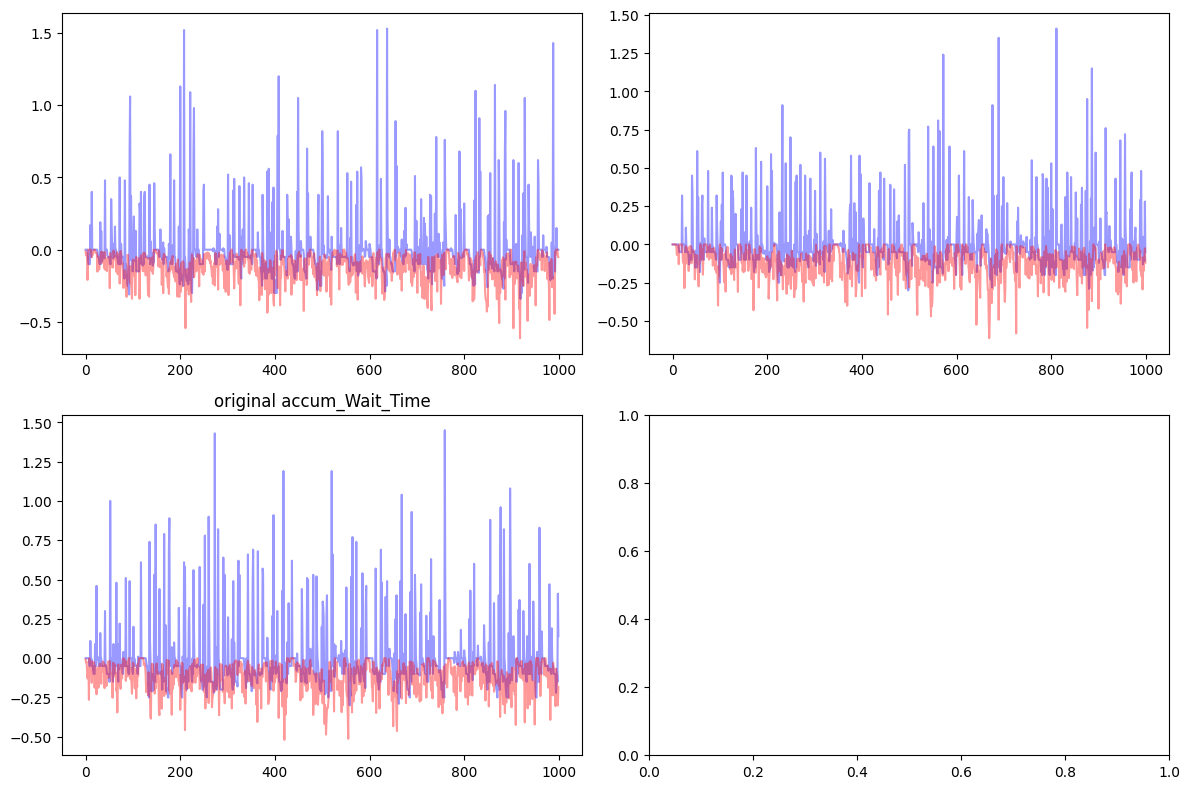

In [36]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))


axes[0,0].plot(diff_accum_wait_time_reward_raw_df['reward_A0']/100, alpha=0.4, color='blue')
axes[0,1].plot(diff_accum_wait_time_reward_raw_df['reward_A2']/100, alpha=0.4, color='blue')
axes[1,0].plot(diff_accum_wait_time_reward_raw_df['reward_A3']/100, alpha=0.4, color='blue')
axes[1,0].set_title('original accum_Wait_Time')

axes[0,0].plot(tyre_pm_reward['reward_A0']/100, alpha=0.4, color='red')
axes[0,1].plot(tyre_pm_reward['reward_A2']/100, alpha=0.4, color='red')
axes[1,0].plot(tyre_pm_reward['reward_A3']/100, alpha=0.4, color='red')
# axes[1,0].set_legend('normalised accum_Wait_Time')

plt.tight_layout()
plt.show()

## AFTER NORMALISATION

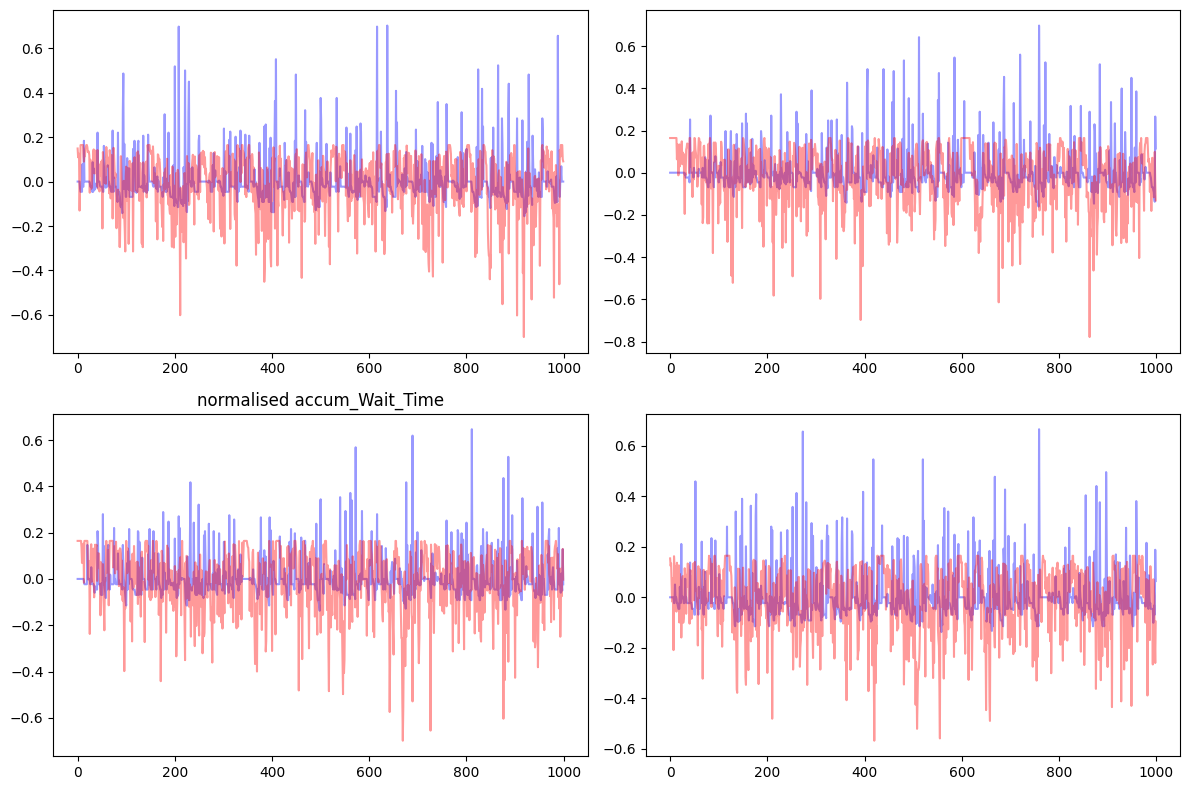

In [37]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))


axes[0,0].plot(normalised_accum_wait_time_reward_df['reward_A0'], alpha=0.4, color='blue')
axes[0,1].plot(normalised_accum_wait_time_reward_df['reward_A1'], alpha=0.4, color='blue')
axes[1,0].plot(normalised_accum_wait_time_reward_df['reward_A2'], alpha=0.4, color='blue')
axes[1,1].plot(normalised_accum_wait_time_reward_df['reward_A3'], alpha=0.4, color='blue')

axes[1,0].set_title('normalised accum_Wait_Time')

axes[0,0].plot(normalised_tyre_pm_reward_df['reward_A0'], alpha=0.4, color='red')
axes[0,1].plot(normalised_tyre_pm_reward_df['reward_A1'], alpha=0.4, color='red')
axes[1,0].plot(normalised_tyre_pm_reward_df['reward_A2'], alpha=0.4, color='red')
axes[1,1].plot(normalised_tyre_pm_reward_df['reward_A3'], alpha=0.4, color='red')

# axes[1,0].set_legend('normalised accum_Wait_Time')

plt.tight_layout()
plt.show()

In [24]:
normalised_tyre_pm_reward_df = (tyre_pm_reward[:][agent_ids] - (-50)) / 232.26

In [25]:
diff_accum_wait_time_reward_raw_df['total_agent_reward'].mean()/16

-0.0184375

## MEASURE THE TYRE PM FROM THE EVAL_METRICS FILE

In [56]:
diff_accum_reward_eval_metrics = get_df_from_csv(FTC_EVALUATED_ABS[0],
                                 eval_dir="fixed_tc",
                                 csv_file_name="eval_metrics.csv",
                                 seed=39)

In [57]:
tyre_pm_reward_eval_metrics = get_df_from_csv(FTC_EVALUATED_ABS[1],
                                 eval_dir="fixed_tc",
                                 csv_file_name="eval_metrics.csv",
                                 seed=39)

In [58]:
diff_accum_reward_eval_metrics["A0_abs_accel"].min()

0.0

In [59]:
diff_accum_reward_eval_metrics["A0_abs_accel"].sum() / 1000

12.187769452922588

In [67]:
diff_accum_reward_eval_metrics["A1_accumulated_waiting_time"].diff().sum()/1000

0.074

In [68]:
diff_accum_reward_eval_metrics["A2_accumulated_waiting_time"].diff().sum()/1000

0.017

In [69]:
diff_accum_reward_eval_metrics["A3_accumulated_waiting_time"].diff().sum()/1000

0.067

## As you can see, the values from the eval_metrics match the reward values from the extra metrics !